In [25]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

#Đọc và chia dữ liệu
df = pd.read_excel("../Data/Cutomer_Churn.xls");
X = df[:][["Age","Tenure","Balance","HasCrCard","IsActiveMember","EstimatedSalary"]]
y = df[:]["Exited"]



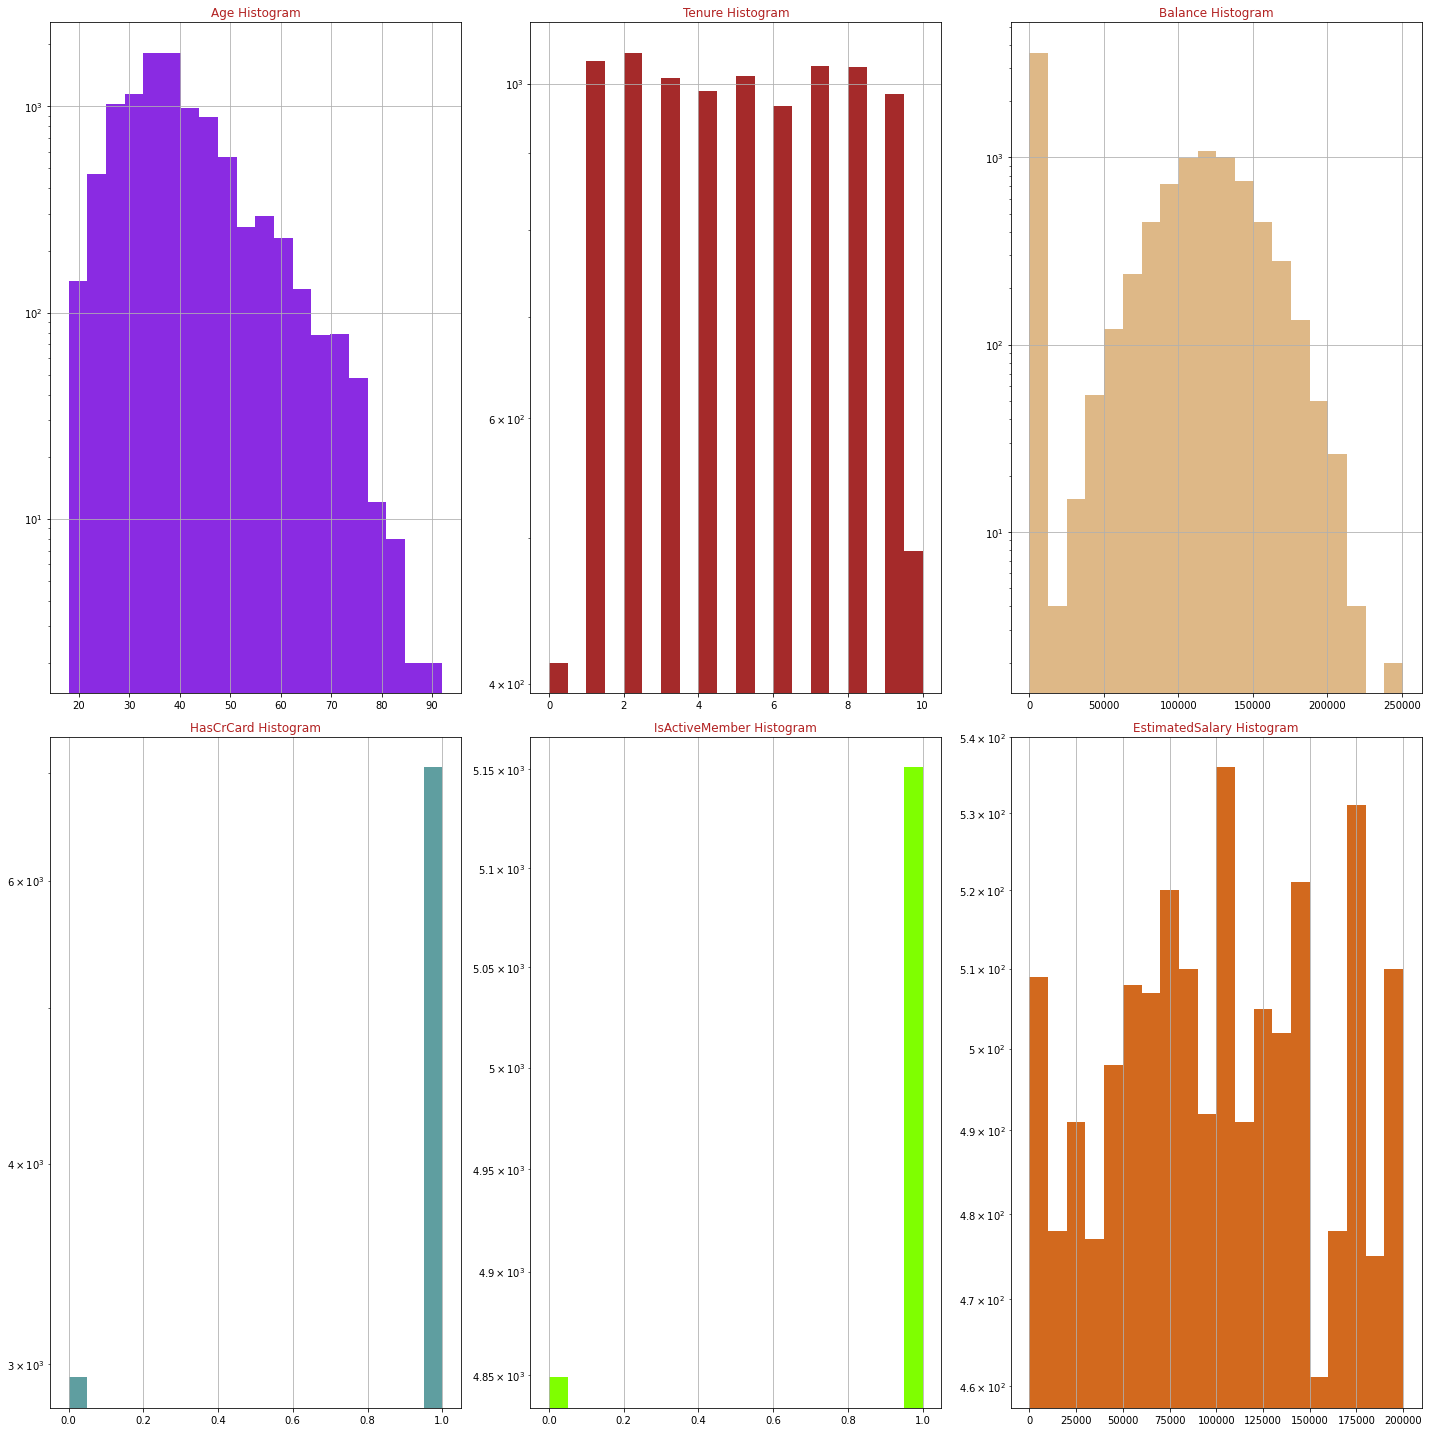

In [26]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(X,X.columns,2,3)

---------------------------Trước khi sử lí dữ liệu------------------------
Kết quả sau khi Test: 76.20 %


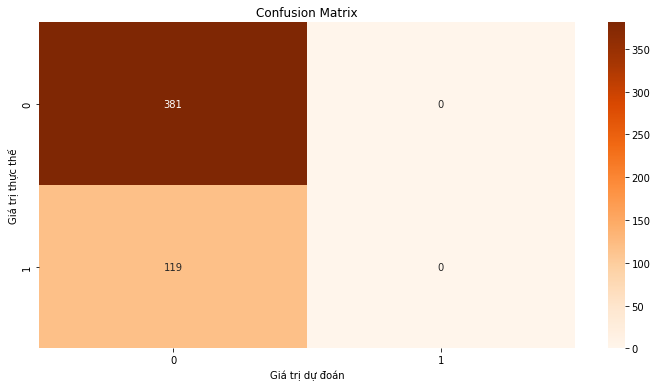

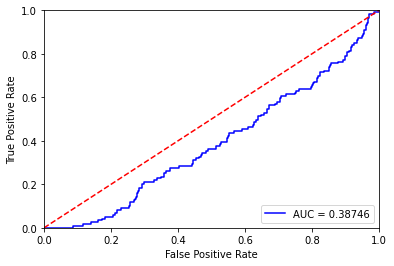

In [27]:

from sklearn.model_selection import train_test_split
#Chia dữ liệu thành tập Train và Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500)

logreg = LogisticRegression()
#Huấn luyện
logreg.fit(X_train,y_train)
#Test
y_pred = logreg.predict(X_test)

pipeline_lrs = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=4)),
                    ('lrn', LogisticRegression())])

pipeline_lrs.fit(X_train,y_train)
y_pred2 = pipeline_lrs.predict(X_test)
print("---------------------------Trước khi sử lí dữ liệu------------------------") 
print ("Kết quả sau khi Test: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Oranges')
plt.ylabel("Giá trị thực thế")
plt.xlabel("Giá trị dự đoán")
plt.show()

#ROC curve
from sklearn.metrics import roc_curve, auc

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plot= auc(fpr, tpr)

#create ROC curve
plt.plot(fpr,tpr,'b',label = 'AUC = %0.5f' % plot)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()



---------------------------Sau khi sử lí dữ liệu--------------------------------
Kết quả sau khi Test: 76.20 %


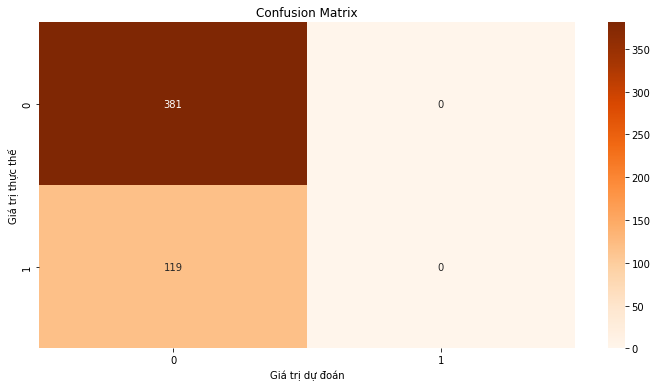

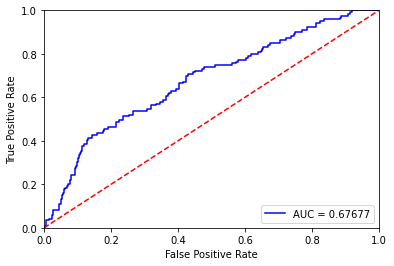

In [28]:
print("---------------------------Sau khi sử lí dữ liệu--------------------------------")
print ("Kết quả sau khi Test: %.2f %%" %(100*accuracy_score(y_test, y_pred2)))
 
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Oranges')
plt.ylabel("Giá trị thực thế")
plt.xlabel("Giá trị dự đoán")
plt.show()

#ROC
y_pred_proba = pipeline_lrs.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plot= auc(fpr, tpr)

#create ROC curve
plt.plot(fpr,tpr,'b',label = 'AUC = %0.5f' % plot)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [29]:
import openpyxl

path = 'Kết Quả.xlsx'

kq = pd.read_excel(path, sheet_name = "LogisticRegression")

row = kq.shape[0]

workbook = openpyxl.load_workbook(path);

add = pd.DataFrame({
    'Lần thứ' : [row+1],
    'Kết quả' : [accuracy_score(y_test,y_pred2)]
})


with pd.ExcelWriter(path,mode="a",engine="openpyxl",if_sheet_exists="overlay") as writer:
    add.to_excel(writer, sheet_name="LogisticRegression",header=None, startrow=row+1,index=False)
    
kq = pd.read_excel(path, sheet_name = "LogisticRegression")
kq


,Lần thứ,Kết quả
0,1,0.804
1,2,0.780
2,3,0.768
3,4,0.794
4,5,0.804
5,6,0.786
6,7,0.800
7,8,0.788
8,9,0.798
9,10,0.808
